<a href="https://colab.research.google.com/github/koiralasandesh/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Import Files

In [ ]:
!wget -O 2018-2019_NBA_Stats.csv https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps

--2020-12-12 04:31:43--  https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving uta.instructure.com (uta.instructure.com)... 34.224.181.213, 52.21.165.220, 54.145.38.170
Connecting to uta.instructure.com (uta.instructure.com)|34.224.181.213|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps [following]
--2020-12-12 04:31:44--  https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving a13430-10505095.cluster38.canvas-user-content.com (a13430-10505095.cluster38.canvas-user-content.com)... 52.4.46.105, 3.2

Import Modules

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read from file and return df

In [ ]:
stats_file = '/content/2018-2019_NBA_Stats.csv'
nba = pd.read_csv(io.FileIO(stats_file))

print("Number of rows and number of columns:", nba.shape)
original_headers = list(nba.columns.values)
print("Column names:", original_headers)
print()

Number of rows and number of columns: (300, 12)
Column names: ['Player', 'Position', 'Team', 'Games Played', 'Minutes Per Game', 'Points Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Three Points Made Per Game', 'Steals Per Game', 'Blocks Per Game', 'Turnovers Per Game']



"Position" is the class attribute/column we are predicting. 

In [ ]:
class_column = 'Position'

The dataset contains attributes such as player name and team name. 
We know that they are not useful for classification and thus do not 
include them as features.

In [ ]:
feature_columns = [ 'Points Per Game', 'Total Rebounds Per Game',\
                   'Assists Per Game', 'Three Points Made Per Game',\
                   'Steals Per Game', 'Blocks Per Game', 'Turnovers Per Game']

In [ ]:
nba_feature = nba[feature_columns]
nba_class = nba[class_column]

print("First three rows")
print(nba[0:300])
print()
print("Feature columns, first three rows:")
print(nba_feature[0:3])
print()
print("Class column, first three rows:")
print(nba_class[0:3])
print()

First three rows
                    Player Position  ... Blocks Per Game  Turnovers Per Game
0             James Harden       SG  ...           0.742               4.532
1    Giannis Antetokounmpo       PF  ...           1.696               3.502
2            Stephen Curry       PG  ...           0.424               2.987
3       Karl-Anthony Towns        C  ...           1.802               3.193
4            Anthony Davis       PF  ...           2.756               2.266
..                     ...      ...  ...             ...                 ...
295          Chris Boucher       PF  ...           1.060               0.515
296         Richaun Holmes        C  ...           0.848               0.515
297          Jusuf Nurkic         C  ...           1.166               2.060
298           Jordan McRae       SG  ...           0.212               0.721
299       DeMarcus Cousins        C  ...           0.742               1.339

[300 rows x 12 columns]

Feature columns, first three rows

# Data Preprocessing

## Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
nba_feature_orig=nba_feature
nba_feature=pd.DataFrame(scalar.fit_transform(nba_feature))
nba_feature.columns=original_headers[5:]
print(nba_feature)

     Points Per Game  ...  Turnovers Per Game
0           1.000000  ...            1.000000
1           0.888889  ...            0.756098
2           0.929630  ...            0.634146
3           0.774074  ...            0.682927
4           0.851852  ...            0.463415
..               ...  ...                 ...
295         0.048148  ...            0.048780
296         0.051852  ...            0.048780
297         0.229630  ...            0.414634
298         0.092593  ...            0.097561
299         0.151852  ...            0.243902

[300 rows x 7 columns]


# K means clustering

In [ ]:
from sklearn import cluster
k_means=cluster.KMeans(n_clusters =5,random_state=1,init="k-means++")
k_means.fit(nba_feature)
labels=k_means.labels_
clustered=pd.DataFrame(labels, index=nba.Player, columns=['Cluster_ID'])
print(clustered)

                       Cluster_ID
Player                           
James Harden                    0
Giannis Antetokounmpo           0
Stephen Curry                   0
Karl-Anthony Towns              3
Anthony Davis                   3
...                           ...
Chris Boucher                   4
Richaun Holmes                  4
Jusuf Nurkic                    3
Jordan McRae                    1
DeMarcus Cousins                4

[300 rows x 1 columns]


In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=nba_feature.columns)

,Points Per Game,Total Rebounds Per Game,Assists Per Game,Three Points Made Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game
0,0.624538,0.302660,0.729439,0.380612,0.647211,0.175853,0.629268
1,0.150834,0.114968,0.179992,0.231947,0.270330,0.101554,0.152238
2,0.355297,0.210024,0.353782,0.295681,0.438372,0.146351,0.330119
3,0.445576,0.561494,0.220307,0.121032,0.369444,0.520115,0.379404
4,0.142735,0.285279,0.129973,0.063874,0.249038,0.309682,0.176829


Text(0, 0.5, 'WCSS')

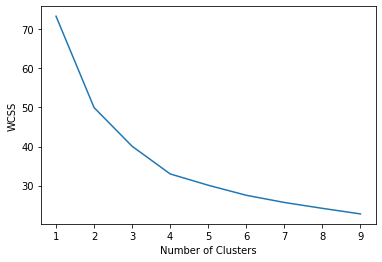

In [ ]:
numClusters = range(1,10)
WCSS = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(nba_feature)
    WCSS.append(k_means.inertia_)

plt.plot(numClusters, WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Hierarchial Clustering

## Agglomerative Clustering

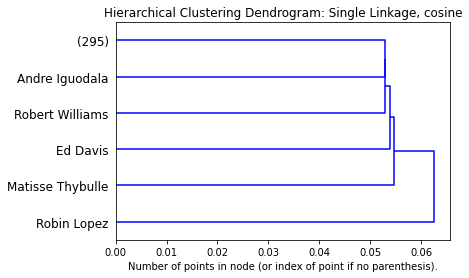

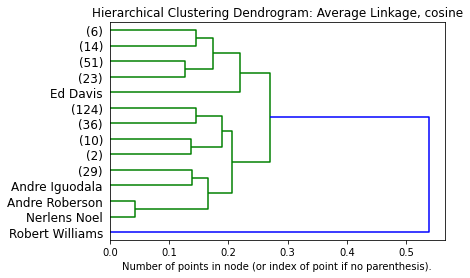

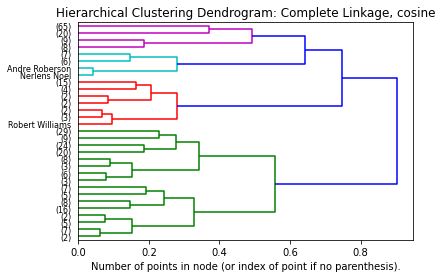

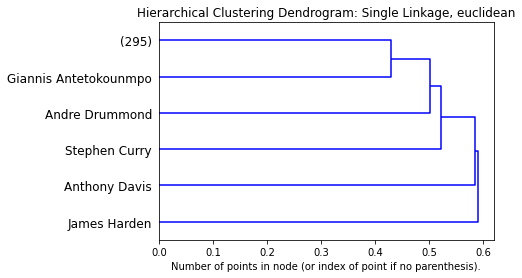

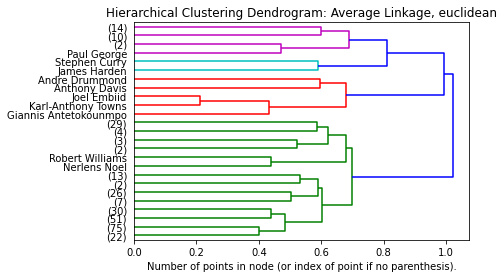

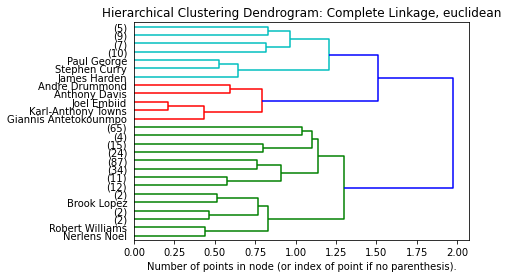

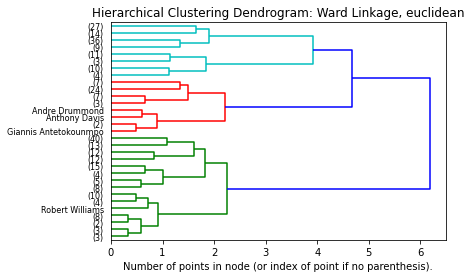

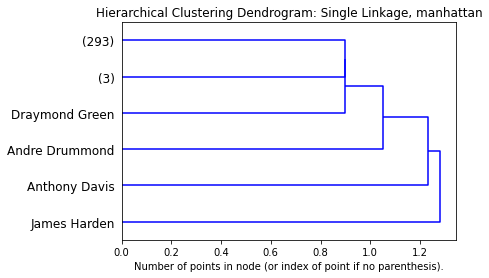

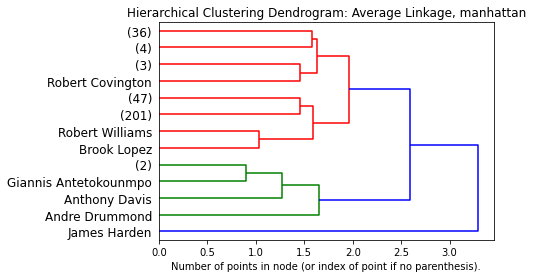

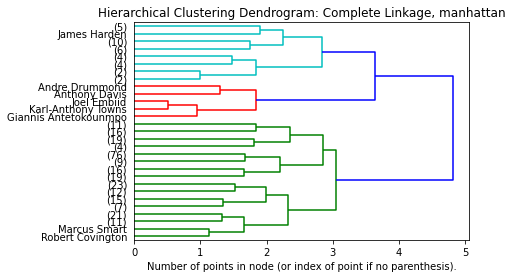

In [ ]:
from scipy.cluster.hierarchy import dendrogram
# %matplotlib inline
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

player_name=nba['Player']
player_positions=nba['Position']

clustering_algorithms = (
    ('Single Linkage', 'single'),
    ('Average Linkage', 'average'),
    ('Complete Linkage', 'complete'),
    ('Ward Linkage', 'ward'),
) 
affinity_metrics = ['cosine', 'euclidean', 'manhattan']


for metric in affinity_metrics: 
    for alg_name, alg in clustering_algorithms:
        if alg == 'ward' and metric != 'euclidean': continue
        model = cluster.AgglomerativeClustering(linkage=alg, affinity=metric, distance_threshold=0, n_clusters=None)
    
        model.fit(nba_feature)
        plt.title('Hierarchical Clustering Dendrogram: ' + alg_name + ", " + metric)
        # plot the top five levels of the dendrogram
        plot_dendrogram(model, truncate_mode='level', p=4, labels=player_name.tolist(), orientation='right')
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()

# Performance Evaluation

In [ ]:
from sklearn import metrics

n_clusters = 5

print(player_name.to_list())
print(player_positions.to_list())

k_means = cluster.KMeans(n_clusters, max_iter=100, random_state=1)
complete = cluster.AgglomerativeClustering(linkage='complete', affinity='euclidean', distance_threshold=None, n_clusters=n_clusters)    
clustering_algorithms = (
    ('K-means', k_means),
    ('Complete Linkage', complete),
)  

for alg_name, alg in clustering_algorithms: 
    print()
    print(alg_name)
    alg.fit(nba_feature)
    labels_pred = alg.labels_
    print(labels_pred)

    if alg == k_means: 
        WCSS = alg.inertia_
        print("Within-Cluster Sum-of-Squares: " + str(WCSS))
    rand = metrics.adjusted_rand_score(player_positions, labels_pred)
    mi = metrics.normalized_mutual_info_score(player_positions, labels_pred) 
    silhouette = metrics.silhouette_score(nba_feature, labels_pred, metric='euclidean')
    print("Adjusted Rand Index: " + str(rand))
    print("Normalized Mutual Information: " + str(mi))
    print("Silhouette Coefficient: " + str(silhouette))


['James Harden', 'Giannis Antetokounmpo', 'Stephen Curry', 'Karl-Anthony Towns', 'Anthony Davis', 'LeBron James', 'Nikola Jokic', 'Damian Lillard', 'Bradley Beal', 'Joel Embiid', 'Andre Drummond', 'Kawhi Leonard', 'Nikola Vucevic', 'Paul George', 'Luka Doncic', 'Kemba Walker', 'Russell Westbrook', 'Ben Simmons', 'Donovan Mitchell', 'Devin Booker', 'Kyrie Irving', 'Trae Young', 'Buddy Hield', 'Rudy Gobert', 'Jrue Holiday', "D'Angelo Russell", "De'Aaron Fox", 'Jimmy Butler', 'DeMar DeRozan', 'Tobias Harris', 'John Collins', 'Julius Randle', 'Khris Middleton', 'LaMarcus Aldridge', 'Pascal Siakam', 'CJ McCollum', 'Deandre Ayton', 'Zach LaVine', 'Blake Griffin', 'Jamal Murray', 'Domantas Sabonis', 'Marvin Bagley III', 'Terry Rozier III', 'Aaron Gordon', 'Bam Adebayo', 'Steven Adams', 'Ja Morant', 'Lauri Markkanen', 'Zion Williamson', 'Eric Bledsoe', 'Jayson Tatum', 'Mike Conley', 'Collin Sexton', 'Thomas Bryant', 'Kyle Kuzma', 'Kyle Lowry', 'Myles Turner', 'Otto Porter Jr', 'Montrezl Harrel